## ひろしまQuest2020【球種予測部門】

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_Columns', 100)

### train_player
- 2017年の選手データ

In [3]:
train_player = pd.read_csv('data/train_player.csv')
print(train_player.shape)
train_player.head()

(911, 25)


,年度,チームID,チーム名,選手ID,選手名,育成選手F,背番号,位置,投,打,身長,体重,生年月日,出身高校ID,出身高校名,出身大学ID,出身大学名,社会人,ドラフト年,ドラフト種別,ドラフト順位,年俸,出身国,出身地,血液型
0,2017,1,巨人,11343,相川 亮二,0,23,捕手,右,右,183,86,1976/7/11,30227,東京学館,0,不明,NaN,1994.0,NaN,5.0,4500,日本,千葉,A
1,2017,1,巨人,11726,實松 一成,0,27,捕手,右,右,177,85,1981/1/18,674,佐賀学園,0,不明,NaN,1998.0,NaN,1.0,3700,日本,佐賀,A
2,2017,1,巨人,12049,阿部 慎之助,0,10,内野手,右,左,180,97,1979/3/20,1114,安田学園,895,中央大,NaN,2000.0,NaN,1.0,26000,日本,千葉,A
3,2017,1,巨人,12107,杉内 俊哉,0,18,投手,左,左,175,82,1980/10/30,740,鹿児島実,0,不明,三菱重工長崎,2001.0,NaN,3.0,5000,日本,福岡,A
4,2017,1,巨人,12179,大竹 寛,0,17,投手,右,右,184,94,1983/5/21,179,浦和学院,0,不明,NaN,2001.0,NaN,1.0,7000,日本,埼玉,B


In [4]:
train_player['年度'].value_counts()

2017    911
Name: 年度, dtype: int64

In [5]:
temp = train_player[train_player['選手名']=='阿部　慎之助']
temp.head()

,年度,チームID,チーム名,選手ID,選手名,育成選手F,背番号,位置,投,打,身長,体重,生年月日,出身高校ID,出身高校名,出身大学ID,出身大学名,社会人,ドラフト年,ドラフト種別,ドラフト順位,年俸,出身国,出身地,血液型
2,2017,1,巨人,12049,阿部 慎之助,0,10,内野手,右,左,180,97,1979/3/20,1114,安田学園,895,中央大,NaN,2000.0,NaN,1.0,26000,日本,千葉,A


In [6]:
train_player['ドラフト種別'].value_counts()

育成選手       105
大学生・社会人     49
高校生         46
Name: ドラフト種別, dtype: int64

In [7]:
train_player['出身国'].value_counts()

日本         820
アメリカ        37
ドミニカ共和国     19
キューバ        10
ベネズエラ        7
台湾           7
メキシコ         4
ブラジル         2
カナダ          1
オランダ         1
オーストラリア      1
タイ           1
アンティル        1
Name: 出身国, dtype: int64

### test_player
- 2018年と2019年のデータ
- 同じ人が2回出てくることがある

In [8]:
test_player = pd.read_csv('data/test_player.csv')
print(test_player.shape)
test_player.head()

(1846, 25)


,年度,チームID,チーム名,選手ID,選手名,育成選手F,背番号,位置,投,打,身長,体重,生年月日,出身高校ID,出身高校名,出身大学ID,出身大学名,社会人,ドラフト年,ドラフト種別,ドラフト順位,年俸,出身国,出身地,血液型
0,2018,1,巨人,11774,上原 浩治,0,11,投手,右,右,187,87,1975/4/3,1248,東海大仰星,1012,大阪体育大,NaN,1998.0,NaN,1.0,20000,日本,大阪,B
1,2018,1,巨人,12049,阿部 慎之助,0,10,内野手,右,左,180,97,1979/3/20,1114,安田学園,895,中央大,NaN,2000.0,NaN,1.0,21000,日本,千葉,A
2,2018,1,巨人,12107,杉内 俊哉,0,18,投手,左,左,175,82,1980/10/30,740,鹿児島実,0,不明,三菱重工長崎,2001.0,NaN,3.0,2500,日本,福岡,A
3,2018,1,巨人,12179,大竹 寛,0,17,投手,右,右,184,94,1983/5/21,179,浦和学院,0,不明,NaN,2001.0,NaN,1.0,5250,日本,埼玉,B
4,2018,1,巨人,400010,内海 哲也,0,26,投手,左,左,186,95,1982/4/29,385,敦賀気比,0,不明,東京ガス,2003.0,NaN,1.0,10000,日本,京都,A


In [9]:
test_player['年度'].value_counts()

2019    928
2018    918
Name: 年度, dtype: int64

In [10]:
temp = test_player[test_player['選手名']=='阿部　慎之助']
temp.head()

,年度,チームID,チーム名,選手ID,選手名,育成選手F,背番号,位置,投,打,身長,体重,生年月日,出身高校ID,出身高校名,出身大学ID,出身大学名,社会人,ドラフト年,ドラフト種別,ドラフト順位,年俸,出身国,出身地,血液型
1,2018,1,巨人,12049,阿部 慎之助,0,10,内野手,右,左,180,97,1979/3/20,1114,安田学園,895,中央大,NaN,2000.0,NaN,1.0,21000,日本,千葉,A
921,2019,1,巨人,12049,阿部 慎之助,0,10,捕手,右,左,180,97,1979/3/20,1114,安田学園,895,中央大,NaN,2000.0,NaN,1.0,16000,日本,千葉,A


### train_pitch
#### 球種【球種予測部門での目的変数】
- 0:ストレート 1:カーブ 2:スライダー 3:シュート 4:フォーク 5:チェンジアップ 6:シンカー 7:カットボール

#### 投球位置区域
||||||
|---|---|---|---|---|
|9|9||10|10|
|9|0|3|6|10|
||1|4|7||
|11|2|5|8|12|
|11|11||12|12|

In [46]:
train_pitch = pd.read_csv('data/train_pitch.csv')
print(train_pitch.shape)
train_pitch.head()

(257117, 51)


,データ内連番,球種,投球位置区域,年度,試合ID,試合内連番,試合内投球数,日付,時刻,ホームチームID,アウェイチームID,球場ID,球場名,試合種別詳細,イニング,表裏,イニング内打席数,打席内投球数,投手ID,投手チームID,投手投球左右,投手役割,投手登板順,投手試合内対戦打者数,投手試合内投球数,投手イニング内投球数,打者ID,打者チームID,打者打席左右,打者打順,打者守備位置,打者試合内打席数,プレイ前ホームチーム得点数,プレイ前アウェイチーム得点数,プレイ前アウト数,プレイ前ボール数,プレイ前ストライク数,プレイ前走者状況,一塁走者ID,二塁走者ID,三塁走者ID,捕手ID,一塁手ID,二塁手ID,三塁手ID,遊撃手ID,左翼手ID,中堅手ID,右翼手ID,成績対象投手ID,成績対象打者ID
0,0,0,0,2017,2017033101,1,1,2017-03-31,18:03:00,1,4,1,東京ドーム,セ・リーグ公式戦,1,表,1,1,1500001,1,右,先発,1,1,1,1,900410,4,左,1,中,1,0,0,0,0,0,___,NaN,NaN,NaN,1300027,12049,800002,1200136,700003,1400101,900093,900397,1500001,900410
1,1,0,8,2017,2017033101,2,2,2017-03-31,18:03:12,1,4,1,東京ドーム,セ・リーグ公式戦,1,表,1,2,1500001,1,右,先発,1,1,2,2,900410,4,左,1,中,1,0,0,0,0,1,___,NaN,NaN,NaN,1300027,12049,800002,1200136,700003,1400101,900093,900397,1500001,900410
2,2,0,5,2017,2017033101,3,3,2017-03-31,18:03:23,1,4,1,東京ドーム,セ・リーグ公式戦,1,表,1,3,1500001,1,右,先発,1,1,3,3,900410,4,左,1,中,1,0,0,0,0,2,___,NaN,NaN,NaN,1300027,12049,800002,1200136,700003,1400101,900093,900397,1500001,900410
3,3,0,12,2017,2017033101,4,4,2017-03-31,18:04:01,1,4,1,東京ドーム,セ・リーグ公式戦,1,表,2,1,1500001,1,右,先発,1,2,4,4,11436,4,右,2,二,1,0,0,1,0,0,___,NaN,NaN,NaN,1300027,12049,800002,1200136,700003,1400101,900093,900397,1500001,11436
4,4,0,8,2017,2017033101,5,5,2017-03-31,18:04:12,1,4,1,東京ドーム,セ・リーグ公式戦,1,表,2,2,1500001,1,右,先発,1,2,5,5,11436,4,右,2,二,1,0,0,1,0,1,___,NaN,NaN,NaN,1300027,12049,800002,1200136,700003,1400101,900093,900397,1500001,11436


In [47]:
train_pitch.columns

Index(['データ内連番', '球種', '投球位置区域', '年度', '試合ID', '試合内連番', '試合内投球数', '日付', '時刻',
       'ホームチームID', 'アウェイチームID', '球場ID', '球場名', '試合種別詳細', 'イニング', '表裏',
       'イニング内打席数', '打席内投球数', '投手ID', '投手チームID', '投手投球左右', '投手役割', '投手登板順',
       '投手試合内対戦打者数', '投手試合内投球数', '投手イニング内投球数', '打者ID', '打者チームID', '打者打席左右',
       '打者打順', '打者守備位置', '打者試合内打席数', 'プレイ前ホームチーム得点数', 'プレイ前アウェイチーム得点数',
       'プレイ前アウト数', 'プレイ前ボール数', 'プレイ前ストライク数', 'プレイ前走者状況', '一塁走者ID', '二塁走者ID',
       '三塁走者ID', '捕手ID', '一塁手ID', '二塁手ID', '三塁手ID', '遊撃手ID', '左翼手ID', '中堅手ID',
       '右翼手ID', '成績対象投手ID', '成績対象打者ID'],
      dtype='object')

In [48]:
train_pitch.describe()

,データ内連番,球種,投球位置区域,年度,試合ID,試合内連番,試合内投球数,ホームチームID,アウェイチームID,球場ID,イニング,イニング内打席数,打席内投球数,投手ID,投手チームID,投手登板順,投手試合内対戦打者数,投手試合内投球数,投手イニング内投球数,打者ID,打者チームID,打者打順,打者試合内打席数,プレイ前ホームチーム得点数,プレイ前アウェイチーム得点数,プレイ前アウト数,プレイ前ボール数,プレイ前ストライク数,一塁走者ID,二塁走者ID,三塁走者ID,捕手ID,一塁手ID,二塁手ID,三塁手ID,遊撃手ID,左翼手ID,中堅手ID,右翼手ID,成績対象投手ID,成績対象打者ID
count,257117.000000,257117.000000,257117.000000,257117.0,2.571170e+05,257117.000000,257117.000000,257117.000000,257117.000000,257117.000000,257117.000000,257117.000000,257117.000000,2.571170e+05,257117.000000,257117.000000,257117.000000,257117.000000,257117.000000,2.571170e+05,257117.000000,257117.000000,257117.000000,257117.000000,257117.000000,257117.000000,257117.000000,257117.000000,7.666900e+04,5.094600e+04,2.594300e+04,2.571170e+05,2.571170e+05,2.571170e+05,2.571170e+05,2.571170e+05,2.571170e+05,2.571170e+05,2.571170e+05,2.571170e+05,2.571170e+05
mean,128558.000000,1.693478,7.518527,2017.0,2.017067e+09,157.167749,152.643894,37.125950,37.443168,2523.755528,4.993501,2.846957,2.953352,1.144028e+06,37.012201,1.778828,9.876317,37.968096,9.695738,9.721118e+05,37.556918,4.806753,2.469809,1.988390,2.090772,1.006448,0.903795,0.892493,9.547925e+05,9.677745e+05,9.727113e+05,1.000293e+06,8.749919e+05,9.260441e+05,9.561525e+05,1.227071e+06,9.006578e+05,9.789757e+05,9.307164e+05,1.143976e+06,9.720902e+05
std,74223.428919,2.055724,3.914788,0.0,1.799731e+04,93.193456,90.594146,102.465137,102.899573,8287.962805,2.626421,1.627178,1.782684,4.092488e+05,102.276077,1.294579,8.045773,31.950086,6.674832,4.666919e+05,103.087014,2.566512,1.265436,2.403292,2.395218,0.815192,0.958119,0.828145,4.672335e+05,4.492505e+05,4.522387e+05,3.839563e+05,5.792964e+05,4.149296e+05,5.407913e+05,3.255355e+05,4.061251e+05,3.193262e+05,4.490980e+05,4.092697e+05,4.666696e+05
min,0.000000,0.000000,0.000000,2017.0,2.017033e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.160600e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.127000e+04,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.127000e+04,1.127000e+04,1.127000e+04,1.134300e+04,1.130200e+04,1.143600e+04,1.168600e+04,1.127000e+04,1.127000e+04,2.012700e+04,1.177100e+04,1.160600e+04,1.127000e+04
25%,64279.000000,0.000000,4.000000,2017.0,2.017052e+09,78.000000,75.000000,3.000000,4.000000,4.000000,3.000000,2.000000,1.000000,9.004150e+05,4.000000,1.000000,3.000000,10.000000,4.000000,7.000340e+05,4.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000100e+05,7.000500e+05,7.000720e+05,7.000990e+05,5.000260e+05,6.000570e+05,6.000840e+05,1.000035e+06,6.000790e+05,9.000930e+05,7.000270e+05,9.004150e+05,7.000340e+05
50%,128558.000000,1.000000,9.000000,2017.0,2.017070e+09,155.000000,150.000000,6.000000,7.000000,8.000000,5.000000,3.000000,3.000000,1.200116e+06,6.000000,1.000000,7.000000,28.000000,9.000000,1.000132e+06,7.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000128e+06,1.000128e+06,1.000132e+06,1.000176e+06,9.000560e+05,1.000132e+06,1.200053e+06,1.300059e+06,9.000110e+05,1.000108e+06,1.000016e+06,1.200116e+06,1.000132e+06
75%,192837.000000,3.000000,11.000000,2017.0,2.017082e+09,232.000000,225.000000,9.000000,9.000000,72.000000,7.000000,4.000000,4.000000,1.500061e+06,11.000000,2.000000,16.000000,62.000000,14.000000,1.300099e+06,9.000000,7.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.300079e+06,1.300059e+06,1.300073e+06,1.300073e+06,1.300101e+06,1.100121e+06,1.500012e+06,1.600003e+06,1.100130e+06,1.100061e+06,1.200101e+06,1.500061e+06,1.300099e+06
max,257116.000000,7.000000,12.000000,2017.0,2.017101e+09,476.000000,467.000000,376.000000,376.000000,30020.000000,12.000000,14.000000,16.000000,1.700016e+06,376.000000,8.000000,38.000000,154.000000,56.000000,1.700019e+06,376.000000,9.000000,7.000000,17.000000,15.000000,2.000000,3.000000,2.000000,1.700019e+06,1.700019e+06,1.700019e+06,1.600156e+06,1.700019e+06,1.600134e+06,1.700018e+06,1.600152e+06,1.700017e+06,1.700013e+06,1.700017e+06,1.700016e+06,1.700019

In [49]:
train_pitch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257117 entries, 0 to 257116
Data columns (total 51 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   データ内連番          257117 non-null  int64  
 1   球種              257117 non-null  int64  
 2   投球位置区域          257117 non-null  int64  
 3   年度              257117 non-null  int64  
 4   試合ID            257117 non-null  int64  
 5   試合内連番           257117 non-null  int64  
 6   試合内投球数          257117 non-null  int64  
 7   日付              257117 non-null  object 
 8   時刻              257117 non-null  object 
 9   ホームチームID        257117 non-null  int64  
 10  アウェイチームID       257117 non-null  int64  
 11  球場ID            257117 non-null  int64  
 12  球場名             257117 non-null  object 
 13  試合種別詳細          257117 non-null  object 
 14  イニング            257117 non-null  int64  
 15  表裏              257117 non-null  object 
 16  イニング内打席数        257117 non-null  int64  
 17  打席内投球数    

In [50]:
train_pitch['球場名'].value_counts()

東京ドーム        21487
横浜           21317
ＺＯＺＯマリン      21265
京セラＤ大阪       21168
マツダスタジアム     20837
ナゴヤドーム       20711
神宮           20587
Koboパーク宮城    19996
メットライフ       19758
ヤフオクドーム      19670
甲子園          18551
札幌ドーム        17626
ほっと神戸         4071
県営大宮           852
松山             613
北九州            599
山形             589
静岡             570
岐阜             550
熊本             536
前橋             536
松本             375
那覇             355
盛岡             336
尾道             334
秋田             325
釧路             317
函館             309
富山             306
倉敷             292
弘前             268
福島             265
三次             261
鹿児島            259
宇都宮            254
浜松             253
帯広             247
旭川             239
豊橋             233
Name: 球場名, dtype: int64

In [51]:
train_pitch['試合種別詳細'].value_counts()

セ・リーグ公式戦    112435
パ・リーグ公式戦    112210
セ・パ交流戦       32472
Name: 試合種別詳細, dtype: int64

In [52]:
train_pitch['投手役割'].value_counts()

先発    168635
救援     88482
Name: 投手役割, dtype: int64

In [53]:
train_pitch['プレイ前走者状況'].value_counts()

___    147021
1__     44650
_2_     21686
12_     17817
1_3      7826
__3      6674
123      6376
_23      5067
Name: プレイ前走者状況, dtype: int64

In [54]:
train_pitch.replace({'球種': 
           {0:'ストレート', 1:'カーブ', 2:'スライダー', 3:'シュート', 4:'フォーク', 5:'チェンジアップ', 6:'シンカー', 7:'カットボール'}
           }, inplace=True)

(array([120396.,  19213.,  47774.,      0.,  18161.,  21344.,      0.,
         13940.,   2921.,  13368.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

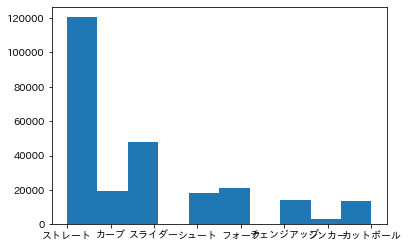

In [55]:
plt.rcParams['font.family'] = 'IPAexGothic'
plt.hist(train_pitch['球種'])

In [56]:
totalrows = len(df)
count = train_pitch.groupby('球種').size()
ballkind = count/totalrows
print(ballkind)

球種
カットボール     0.051992
カーブ        0.074725
シュート       0.070633
シンカー       0.011361
ストレート      0.468254
スライダー      0.185806
チェンジアップ    0.054217
フォーク       0.083013
dtype: float64


### test_pitch
- 2018年と2019のデータ
- '球種', '投球位置区域'がない

In [67]:
test_pitch = pd.read_csv('data/test_pitch.csv')
print(test_pitch.shape)
test_pitch.head()

(521650, 49)


,データ内連番,年度,試合ID,試合内連番,試合内投球数,日付,時刻,ホームチームID,アウェイチームID,球場ID,球場名,試合種別詳細,イニング,表裏,イニング内打席数,打席内投球数,投手ID,投手チームID,投手投球左右,投手役割,投手登板順,投手試合内対戦打者数,投手試合内投球数,投手イニング内投球数,打者ID,打者チームID,打者打席左右,打者打順,打者守備位置,打者試合内打席数,プレイ前ホームチーム得点数,プレイ前アウェイチーム得点数,プレイ前アウト数,プレイ前ボール数,プレイ前ストライク数,プレイ前走者状況,一塁走者ID,二塁走者ID,三塁走者ID,捕手ID,一塁手ID,二塁手ID,三塁手ID,遊撃手ID,左翼手ID,中堅手ID,右翼手ID,成績対象投手ID,成績対象打者ID
0,0,2018,2018033001,1,1,2018-03-30,18:03:00,1,5,1,東京ドーム,セ・リーグ公式戦,1,表,1,1,1200041,1,右,先発,1,1,1,1,1500086,5,左,1,中,1,0,0,0,0,0,___,NaN,NaN,NaN,1300027,1400101,1600059,1200136,700003,1600184,600037,900397,1200041,1500086
1,1,2018,2018033001,2,2,2018-03-30,18:03:39,1,5,1,東京ドーム,セ・リーグ公式戦,1,表,2,1,1200041,1,右,先発,1,2,2,2,400001,5,左,2,二,1,0,0,1,0,0,___,NaN,NaN,NaN,1300027,1400101,1600059,1200136,700003,1600184,600037,900397,1200041,400001
2,2,2018,2018033001,3,3,2018-03-30,18:03:57,1,5,1,東京ドーム,セ・リーグ公式戦,1,表,2,2,1200041,1,右,先発,1,2,3,3,400001,5,左,2,二,1,0,0,1,0,1,___,NaN,NaN,NaN,1300027,1400101,1600059,1200136,700003,1600184,600037,900397,1200041,400001
3,3,2018,2018033001,4,4,2018-03-30,18:04:40,1,5,1,東京ドーム,セ・リーグ公式戦,1,表,3,1,1200041,1,右,先発,1,3,4,4,400057,5,左,3,右,1,0,0,2,0,0,___,NaN,NaN,NaN,1300027,1400101,1600059,1200136,700003,1600184,600037,900397,1200041,400057
4,4,2018,2018033001,5,5,2018-03-30,18:04:56,1,5,1,東京ドーム,セ・リーグ公式戦,1,表,3,2,1200041,1,右,先発,1,3,5,5,400057,5,左,3,右,1,0,0,2,1,0,___,NaN,NaN,NaN,1300027,1400101,1600059,1200136,700003,1600184,600037,900397,1200041,400057


In [68]:
test_pitch.columns

Index(['データ内連番', '年度', '試合ID', '試合内連番', '試合内投球数', '日付', '時刻', 'ホームチームID',
       'アウェイチームID', '球場ID', '球場名', '試合種別詳細', 'イニング', '表裏', 'イニング内打席数',
       '打席内投球数', '投手ID', '投手チームID', '投手投球左右', '投手役割', '投手登板順', '投手試合内対戦打者数',
       '投手試合内投球数', '投手イニング内投球数', '打者ID', '打者チームID', '打者打席左右', '打者打順', '打者守備位置',
       '打者試合内打席数', 'プレイ前ホームチーム得点数', 'プレイ前アウェイチーム得点数', 'プレイ前アウト数', 'プレイ前ボール数',
       'プレイ前ストライク数', 'プレイ前走者状況', '一塁走者ID', '二塁走者ID', '三塁走者ID', '捕手ID', '一塁手ID',
       '二塁手ID', '三塁手ID', '遊撃手ID', '左翼手ID', '中堅手ID', '右翼手ID', '成績対象投手ID',
       '成績対象打者ID'],
      dtype='object')

In [69]:
test_pitch['年度'].value_counts()

2018    261105
2019    260545
Name: 年度, dtype: int64

### サンプルのサブミットファイルを作成

In [57]:
test_pitch = pd.read_csv('data/test_pitch.csv')
print(test_pitch.shape)
testrows = len(test_pitch)

(521650, 49)


In [58]:
submit = pd.DataFrame({
    'index': np.arange(testrows),
    'ストレート': np.full(testrows, ballkind['ストレート']),
    'カーブ': np.full(testrows, ballkind['カーブ']),
    'スライダー': np.full(testrows, ballkind['スライダー']),
    'シュート': np.full(testrows, ballkind['シュート']),
    'フォーク': np.full(testrows, ballkind['フォーク']),
    'チェンジアップ': np.full(testrows, ballkind['チェンジアップ']),
    'シンカー': np.full(testrows, ballkind['シンカー']),
    'カットボール': np.full(testrows, ballkind['カットボール'])
})
submit.head()

,index,ストレート,カーブ,スライダー,シュート,フォーク,チェンジアップ,シンカー,カットボール
0,0,0.468254,0.074725,0.185806,0.070633,0.083013,0.054217,0.011361,0.051992
1,1,0.468254,0.074725,0.185806,0.070633,0.083013,0.054217,0.011361,0.051992
2,2,0.468254,0.074725,0.185806,0.070633,0.083013,0.054217,0.011361,0.051992
3,3,0.468254,0.074725,0.185806,0.070633,0.083013,0.054217,0.011361,0.051992
4,4,0.468254,0.074725,0.185806,0.070633,0.083013,0.054217,0.011361,0.051992


In [ ]:
#submit.to_csv('submit/test_submit.csv', header=False, index=False)